<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [237]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-05-24 23:36:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.3'

     0K .......... .......... .......... .......... ..........  0%  106K 5m39s
    50K .......... .......... .......... .......... ..........  0% 2.12M 2m57s
   100K .......... .......... .......... .......... ..........  0%  215K 2m53s
   150K .......... .......... .......... .......... ..........  0%  344K 2m36s
   200K .......... .......... .......... .......... ..........  0%  981K 2m12s
   

Connect to the database.


In [238]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # Open a database connection

 21400K .......... .......... .......... .......... .......... 59% 7.16M 3s
 21450K .......... .......... .......... .......... .......... 60% 6.27M 2s
 21500K .......... .......... .......... .......... .......... 60% 58.4M 2s
 21550K .......... .......... .......... .......... .......... 60% 46.5M 2s
 21600K .......... .......... .......... .......... .......... 60% 32.5M 2s
 21650K .......... .......... .......... .......... .......... 60% 3.88M 2s
 21700K .......... .......... .......... .......... .......... 60% 16.1M 2s
 21750K .......... .......... .......... .......... .......... 60% 80.7M 2s
 21800K .......... .......... .......... .......... .......... 60% 46.5M 2s
 21850K .......... .......... .......... .......... .......... 61% 16.0M 2s
 21900K .......... .......... .......... .......... .......... 61%  122M 2s
 21950K .......... .......... .......... .......... .......... 61% 26.0M 2s
 22000K .......... .......... .......... .......... .......... 61% 71.4M 2s
 22050K ....

Import pandas module.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master;
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# Print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table';
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
group by age
order by age
"""

pd.read_sql_query(QUERY, conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = "master"  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0, 0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


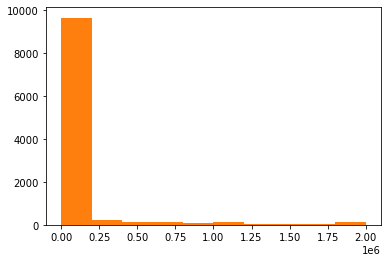

In [12]:
QUERY = """
SELECT ConvertedComp FROM master;
"""

df = pd.read_sql_query(QUERY, conn)
plt.hist(df, color = "tab:orange")
plt.show()

### Box Plots


Plot a box plot of `Age.`


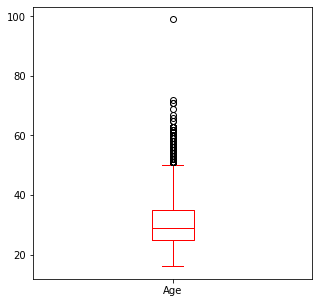

In [57]:
# sns.boxplot(x = df["Age"], data = df)

QUERY = """
SELECT Age, MainBranch FROM master;
"""

df = pd.read_sql_query(QUERY, conn)
df["Age"].plot(kind = "box", color = "red", figsize = (5, 5))
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

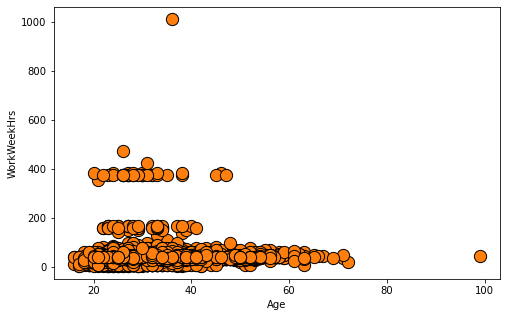

In [53]:
# sns.scatterplot(x = df["Age"], y = df["WorkWeekHrs"], data = df)

QUERY = """
SELECT Age, ConvertedComp, WorkWeekHrs, CodeRevHrs, MainBranch
FROM master
"""

df =  pd.read_sql_query(QUERY, conn)
df.plot(kind = "scatter", x = "Age", y = 'WorkWeekHrs', figsize = (8, 5),
        color = "tab:orange", s = 150, ec = "k")

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


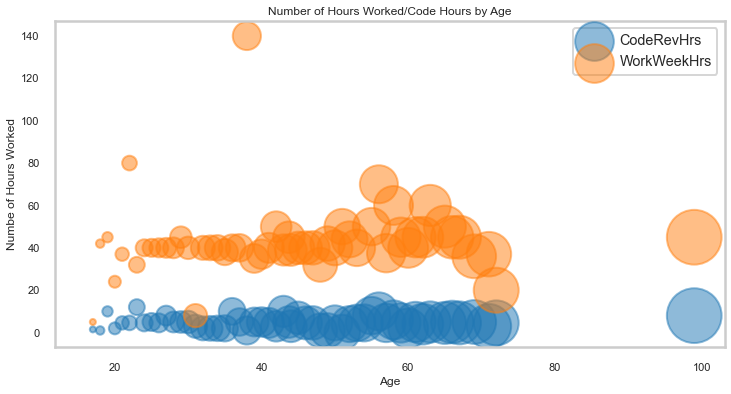

In [172]:
# Three Bubble Plots, don't know which one is correct. (2nd & 3rd are the same)
# and this one has normalized the Age column

Query = """select WorkWeekHrs, CodeRevHrs, Age, count(*) AS Count
FROM master
GROUP BY Age
ORDER BY AGE;
"""

df = pd.read_sql_query(Query, conn)

avg_age = df["Age"].mean(axis = 0)
df["Age"].replace(np.nan, avg_age, inplace = True)

avg_CodeRevHrs = df["CodeRevHrs"].mean(axis = 0)
df["CodeRevHrs"].replace(np.nan, avg_CodeRevHrs, inplace = True)

normalized_age = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

ax0 = df.plot(kind = "scatter", x = "Age", y = "CodeRevHrs", figsize = (12, 6), alpha = 0.5,
                color = "tab:blue", s = normalized_age * 3000)  # Pass in weights

ax0 = df.plot(ax = ax0, kind = "scatter", x = "Age", y = "WorkWeekHrs", figsize = (12, 6), alpha = 0.5,
                color = "tab:orange", s = normalized_age * 3000)  # Pass in weights

ax0.set_ylabel("Numbe of Hours Worked")
ax0.set_title("Number of Hours Worked/Code Hours by Age")
ax0.legend(["CodeRevHrs", "WorkWeekHrs"], fontsize = "x-large")
plt.grid(None)

In [84]:
import plotly.express as px
fig = px.scatter(df, x = "WorkWeekHrs", y = "CodeRevHrs", size = "Age", size_max = 30) # log_x = True can auto focus at 
fig.show()                                                                             # intensive point

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

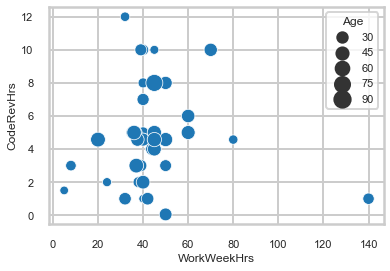

In [85]:
sns.scatterplot(x = df["WorkWeekHrs"], y = df["CodeRevHrs"], size = df["Age"], data = df)
# plt.savefig("Bubble_plot_Seaborn_scatterplot.png", format = "png", dpi = 150)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Count
DatabaseDesireNextYear       
PostgreSQL               4328
MongoDB                  3649
Redis                    3331
MySQL                    3281
Elasticsearch            2856


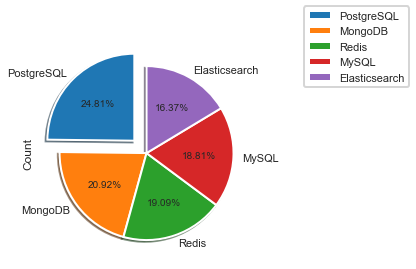

In [136]:
QUERY = """
select COUNT(DatabaseDesireNextYear) AS Count, DatabaseDesireNextYear
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(DatabaseDesireNextYear) DESC LIMIT 5

"""

df = pd.read_sql_query(QUERY, conn)
df.set_index("DatabaseDesireNextYear", inplace = True)
print(df)
""
df.plot(kind = "pie", x = "Count", subplots = True, startangle = 90, shadow = True, 
        explode = (0.2, 0, 0, 0, 0), autopct = "%1.2f%%", legend = True)
plt.legend(bbox_to_anchor = (1.2, 1.2))

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [174]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age 
FROM master
    WHERE Age BETWEEN 30 AND 35;
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,WorkWeekHrs,CodeRevHrs,Age
0,8.0,3.0,31.0
1,40.0,2.0,34.0
2,40.0,2.0,32.0
3,42.0,15.0,34.0
4,40.0,2.0,33.0


In [175]:
age_grp_median = df.groupby("Age").median()  # Use mean() is  slighty make sense, but the Teaching staff /
age_grp_median.head()                        # said this is correct..

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0


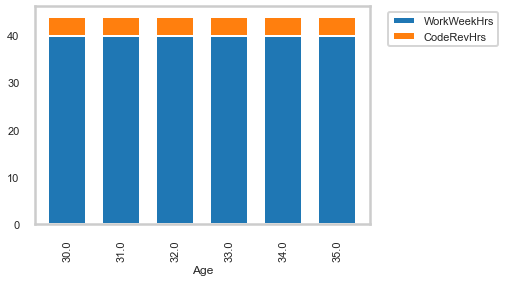

In [176]:
age_grp_median.plot(kind = "bar", stacked = True, width = 0.7)
plt.legend(bbox_to_anchor = (1.4, 1))
plt.grid(None)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [181]:
QUERY = """
SELECT ConvertedComp, Age FROM master
    WHERE Age BETWEEN 45 AND 60;
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,ConvertedComp,Age
0,103000.0,47.0
1,NaN,54.0
2,54996.0,47.0
3,62807.0,47.0
4,72522.0,45.0


In [200]:
age_grp_median2 = df.groupby("Age").median()
age_grp_median2.head()

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0


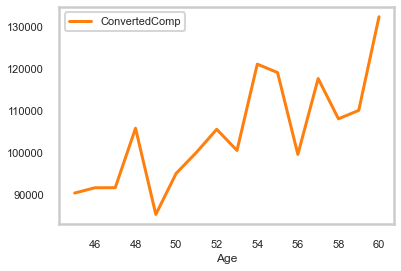

In [201]:
age_grp_median2.plot(color = "tab:orange")
plt.grid(None)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [241]:
QUERY = """
SELECT COUNT(MainBranch) AS 'Count', MainBranch
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY, conn)
df["ylabel"] = pd.DataFrame({"Letters": ["Dev", "Not Dev"]})
df

,Count,MainBranch,ylabel
0,10618,I am a developer by profession,Dev
1,780,"I am not primarily a developer, but I write co...",Not Dev


In [253]:
df["ylabel"].values

array(['Dev', 'Not Dev'], dtype=object)

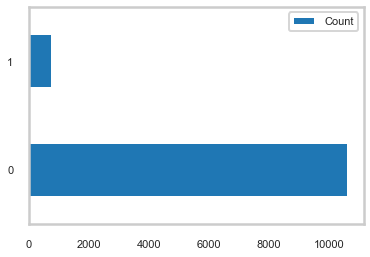

In [256]:
df.plot(kind = "barh")  ## Unable change the yticks labels
plt.grid(None)
plt.show()

Close the database connection.


In [257]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
